In [3]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show, axes, sci
from matplotlib import cm, colors
from thunder import KMeans, PCA, RegressionModel, Colorize
import numpy as np
from numpy import amin, amax, ravel, sum, outer, inner, mean, shape, dot, transpose, concatenate, ones, asarray
image = Colorize.image
sns.set_style("ticks")
sns.set_context('notebook')
plt.ioff()

def center(m):
    y = m.copy()
    y[y>0] = y[y>0]/max(y[y>0])
    y[y<0] = y[y<0]/-min(y[y<0])
    return y

def analysis( int ):
    
	norm = tsc.loadImages('/mnt/downloads/Kevin/'+str(i)+'/', inputFormat='tif')
	m=norm.mean()
	plt.imshow(m, cmap='gray', aspect='auto')
	plt.savefig('/mnt/downloads/tempK/Meanimage-'+str(int)+'.png', dpi=300, bbox_inches='tight')
	norm = norm.toTimeSeries(size="64M")
	norm=norm.squelch(10).normalize()
	norm.cache()
# 	filtered = norm.filterOnValues(lambda x: std(x) > 0.05)
    
# 	modelK=KMeans(k=30).fit(norm)
# 	newclrs = Colorize.optimize(modelK.centers, asCmap=True)
# 	sns.set_style('darkgrid')
# 	plt.gca().set_color_cycle(newclrs.colors)
# 	plt.plot(modelK.centers.T)
# 	plt.savefig('/mnt/downloads/temp/Kmeans30-'+str(int)+'.png', dpi=300, bbox_inches='tight')

# 	imgLabels = modelK.predict(norm).pack()
# 	sim = modelK.similarity(norm)
# 	imgSim = sim.pack()
# 	brainmap = Colorize(cmap=newclrs).transform(imgLabels, mask=imgSim)
# 	sns.set_style('white')
# 	plt.plot(brainmap)
# 	plt.savefig('/mnt/downloads/temp/Kmeans30b-'+str(int)+'.png', dpi=300, bbox_inches='tight')
    
	modelcc=PCA(k=3).fit(norm)
	plt.plot(modelcc.comps.T);
	plt.savefig('/mnt/downloads/tempK/PCA-'+str(int)+'.png', dpi=300, bbox_inches='tight')
	imgs = modelcc.scores.pack()
    
# 	vmin = amin(imgs)
# 	vmax = amax(imgs)
	maps = Colorize(cmap='indexed', colors=[ "blue","green" , "red"]).transform(imgs)
	plt.imshow(maps);
	plt.savefig('/mnt/downloads/tempK/PCAb-'+str(int)+'.png', dpi=300, bbox_inches='tight')

    
# 	model = RegressionModel.load(test, "linear")
# 	results = model.fit(norm)
# 	betas=results.select('betas').pack()
# 	rsq = results.select('stats').pack()
# # 	vmin = amin(betas)
# 	vmax = amax(betas)
# 	maps = Colorize(cmap='indexed', colors=[ "red","green", "blue"], vmin=0, vmax=vmax).transform(betas)
# 	plt.imshow(maps)
# 	plt.savefig('/mnt/downloads/tempK/linreg-'+str(int)+'.png', dpi=300, bbox_inches='tight')
# 	plt.imshow(rsq)
# 	plt.savefig('/mnt/downloads/tempK/linregrsq-'+str(int)+'.png', dpi=300, bbox_inches='tight')
# 	maps = Colorize(cmap='indexed', colors=[ "red","green", "blue"], vmin=0, vmax=vmax).transform(betas, mask=rsq)
# 	plt.imshow(maps)
# 	plt.savefig('/mnt/downloads/tempK/linreg-'+str(int)+'.png', dpi=300, bbox_inches='tight')
	
# 	vmin = amin(betas)
# 	vmax = amax(betas)
# 	fig = figure(dpi=300)
# 	plt.subplots(1, 3, sharex=True, sharey=True)
# 	for j in range(0,3):
# 		n=betas[j,]
# 		plt.subplot(1, 3, j+1);
# 		plt.imshow(n, vmin=vmin, vmax=vmax, cmap='jet', aspect='auto')
# 	plt.savefig('/mnt/downloads/tempK/linregb-'+str(int)+'.png', dpi=300, bbox_inches='tight')
# 	fig = figure(dpi=300)
		
	modelK=KMeans(k=5).fit(norm)
	newclrs = Colorize.optimize(modelK.centers, asCmap=True)
	plt.gca().set_color_cycle(newclrs.colors)
	plt.plot(modelK.centers.T);
	plt.savefig('/mnt/downloads/tempK/Kmeans5-'+str(int)+'.png', dpi=300, bbox_inches='tight')
	
	imgLabels = modelK.predict(norm).pack()
	sim = modelK.similarity(norm)
	imgSim = sim.pack()
	brainmap = Colorize(cmap=newclrs).transform(imgLabels, mask=imgSim)
	image(brainmap)
	plt.savefig('/mnt/downloads/tempK/Kmeans5b-'+str(int)+'.png', dpi=300, bbox_inches='tight')
    
	plt.subplots(1, 2, sharex=True, sharey=True)
	for j in range(0,2):
		x = test[j]        
		corrs = norm.correlate(x)
		corrMat = center(corrs.pack())
		plt.subplot(1, 2, j+1);
		plt.imshow(corrMat, cmap='RdBu_r', aspect='auto')
	plt.savefig('/mnt/downloads/tempK/correlation-'+str(int)+'.png', dpi=300, bbox_inches='tight')


    

# 	modelK=KMeans(k=3).fit(norm)
# 	newclrs = Colorize.optimize(modelK.centers, asCmap=True)
# 	sns.set_style('darkgrid')
# 	plt.gca().set_color_cycle(newclrs.colors)
# 	plt.plot(modelK.centers.T);
# 	plt.savefig('/mnt/downloads/temp/Kmeans3-'+str(int)+'.png', dpi=300, bbox_inches='tight')
	
# 	imgLabels = modelK.predict(norm).pack()
# 	sim = modelK.similarity(norm)
# 	imgSim = sim.pack()
# 	brainmap = Colorize(cmap=newclrs).transform(imgLabels, mask=imgSim)
# 	sns.set_style('white')
# 	image(brainmap)
# 	plt.savefig('/mnt/downloads/temp/Kmeans3b-'+str(int)+'.png', dpi=300, bbox_inches='tight')
	return

for i in range(2,3):
	if 1 <= i <= 22:
		plt.close("all")
		test = np.zeros((2,602),dtype=np.int)
# 		test[0,80:105]=1
# 		test[1,120:145]=1
		test[0,51:60]=1
		test[1,101:110]=1
		test[0,151:160]=1
		test[1,201:210]=1
		test[0,251:260]=1
		test[1,301:310]=1 
		test[0,351:360]=1
		test[1,401:410]=1
		test[0,451:460]=1
		test[1,501:510]=1
		analysis(i)
		plt.close("all")
	elif 23 < i <= 50:
		plt.close("all")
		test = np.zeros((3,400),dtype=np.int)
		test[0,230:255]=1
		test[1,270:295]=1
		test[2,53:59]=1
		test[2,73:79]=1
		test[2,98:104]=1
		test[2,118:124]=1
		test[2,138:144]=1
		analysis(i)
		plt.close("all")
# 	elif 36 < i <= 57:
# 		test = np.zeros((3,450),dtype=np.int)
# 		test[0,154:184]=1
# 		test[1,234:264]=1
# 		test[2,154:164]=1
# 		analysis(i)
# 		plt.close("all")

Exception: Size of signal to correlate with, 353, does not match size of series

In [3]:
		test = np.zeros((1,353),dtype=np.int)
# 		test[0,80:105]=1
# 		test[1,120:145]=1
		test[0,51:60]=1
		test[0,101:110]=1
		test[0,151:160]=1
		test[0,201:210]=1
		test[0,251:260]=1
		test[0,301:310]=1 
        

In [5]:
	norm = tsc.loadImages('/mnt/downloads/Kevin/2/', inputFormat='tif')
	norm = norm.toTimeSeries(size="64M")
	norm=norm.squelch(10).normalize()
	norm.cache()

TimeSeries
nrecords: None (inspect to compute)
dtype: None (inspect to compute)
dims: min=(0, 0), max=(451, 252), count=(452, 253)
index: [  0   1   2   3   4   5   6   7   8   9  10  11 ... ] (length: 602)

In [6]:
	plt.subplots(1, 2, sharex=True, sharey=True)
	for j in range(0,2):
		x = test[j]        
		corrs = norm.correlate(x)
		corrMat = center(corrs.pack())
		plt.subplot(1, 2, j+1);
		plt.imshow(corrMat, cmap='RdBu_r', aspect='auto')
	plt.savefig('/mnt/downloads/tempK/correlation-'+str(int)+'.png', dpi=300, bbox_inches='tight')

In [7]:
modelK

NameError: name 'modelK' is not defined

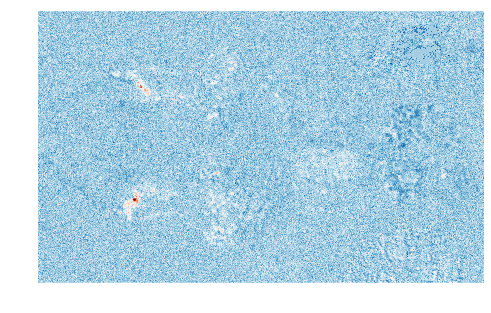

In [35]:
fig = figure(dpi=300)
image(corrsi, cmap='RdBu_r')

In [5]:
	modelK=KMeans(k=5).fit(norm)
	newclrs = Colorize.optimize(modelK.centers, asCmap=True)
	plt.gca().set_color_cycle(newclrs.colors)
	plt.plot(modelK.centers.T);
	plt.savefig('/mnt/downloads/tempK/Kmeans5-'+str(int)+'.png', dpi=300, bbox_inches='tight')

In [6]:
	imgLabels = modelK.predict(norm).pack()
	sim = modelK.similarity(norm)
	imgSim = sim.pack()
	brainmap = Colorize(cmap=newclrs).transform(imgLabels, mask=imgSim)
	image(brainmap)
	plt.savefig('/mnt/downloads/tempK/Kmeans5b-'+str(int)+'.png', dpi=300, bbox_inches='tight')

In [7]:
	modelcc=PCA(k=3).fit(norm)
	plt.plot(modelcc.comps.T);
	plt.savefig('/mnt/downloads/tempK/PCA-'+str(int)+'.png', dpi=300, bbox_inches='tight')
	imgs = modelcc.scores.pack()
    
	maps = Colorize(cmap='indexed', colors=[ "blue","green" , "red"]).transform(imgs)
	plt.imshow(maps);
	plt.savefig('/mnt/downloads/tempK/PCAb-'+str(int)+'.png', dpi=300, bbox_inches='tight')


In [8]:
plt.imshow(corrMat, cmap='RdBu_r', aspect='auto')
plt.savefig('/mnt/downloads/tempK/correlation-'+str(int)+'.png', dpi=300, bbox_inches='tight')

In [9]:
corrsi=corrs.pack()
plt.imshow(corrsi, cmap='RdBu_r', aspect='auto')
plt.savefig('/mnt/downloads/tempK/correlationb-'+str(int)+'.png', dpi=300, bbox_inches='tight')

In [10]:
		plt.close("all")

In [14]:
plt.ioff()

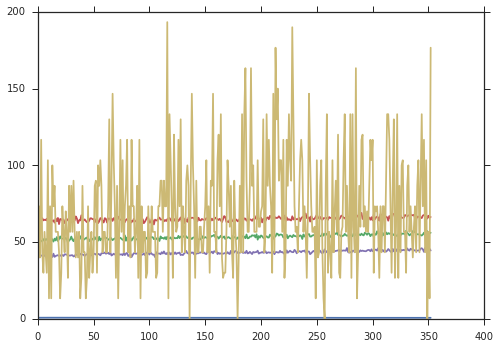

In [15]:
plt.plot(modelK.centers.T);
plt.savefig('/mnt/downloads/tempK/Kmeans5-'+str(int)+'.png', dpi=300, bbox_inches='tight')

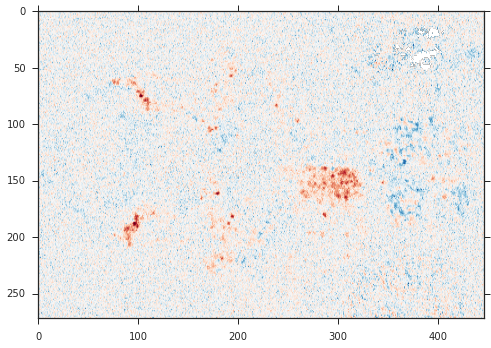

In [19]:
plt.imshow(corrMat, cmap='RdBu_r', aspect='auto')
plt.savefig('/mnt/downloads/tempK/correlation-'+str(int)+'.png', dpi=300, bbox_inches='tight')

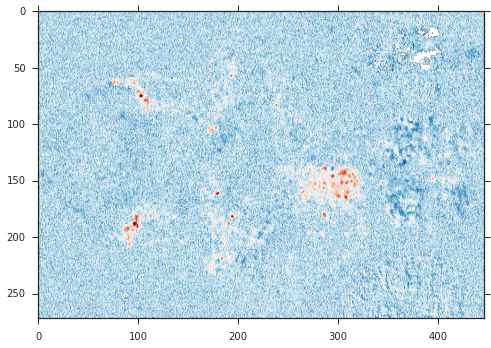

In [20]:
plt.imshow(corrsi, cmap='RdBu_r', aspect='auto')
plt.savefig('/mnt/downloads/tempK/correlationb-'+str(int)+'.png', dpi=300, bbox_inches='tight')

In [22]:
m=tsc.loadImages('/mnt/downloads/Kevin/1/', inputFormat='tif').mean()


AssertionError: 

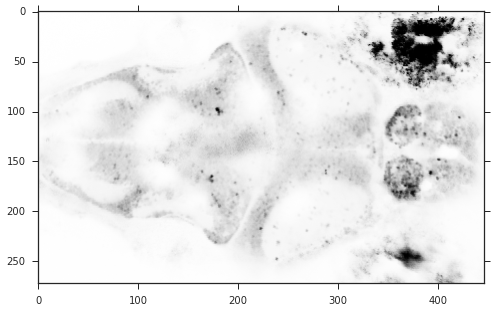

In [23]:
plt.imshow(m)
plt.savefig('/mnt/downloads/tempK/Meanimage-'+str(int)+'.png', dpi=300, bbox_inches='tight')

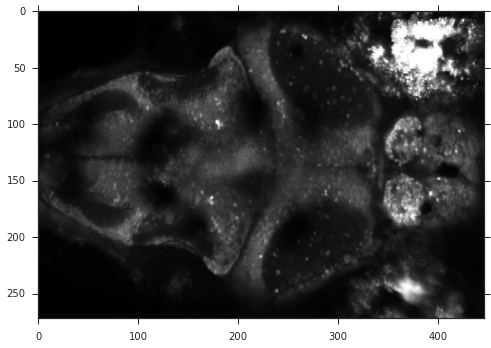

In [32]:
plt.imshow(m, cmap='gray', aspect='auto')
plt.savefig('/mnt/downloads/tempK/Meanimage-'+str(int)+'.png', dpi=300, bbox_inches='tight')

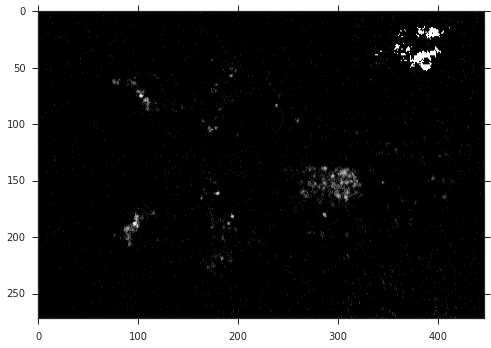

In [31]:
plt.imshow(corrsi, cmap='gray', aspect='auto',vmin=0.1)
plt.savefig('/mnt/downloads/tempK/threshcor-'+str(int)+'.png', dpi=300, bbox_inches='tight')

In [39]:
np.savetxt("/mnt/downloads/tempK/corrMat.csv", corrMat, delimiter=",")
np.savetxt("/mnt/downloads/tempK/corrsi.csv", corrsi, delimiter=",")


In [36]:
test

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [37]:
corrMat

array([[-0.03529637,  0.08327967, -0.03777279, ..., -0.13070417,
         0.12137941, -0.12717139],
       [ 0.07287167,  0.10110743, -0.1241794 , ..., -0.10897763,
         0.11996792, -0.14101254],
       [-0.10517495, -0.10230165, -0.24171182, ...,  0.1355956 ,
        -0.04365486,  0.00159669],
       ..., 
       [ 0.03733819,  0.01445568, -0.06216339, ..., -0.15662916,
         0.02516573, -0.23000595],
       [ 0.03779704, -0.11612976, -0.05656455, ...,  0.11719105,
         0.07630425,  0.17640436],
       [ 0.01516495, -0.09619587, -0.07815087, ...,  0.03070403,
         0.03000008, -0.02504603]])

In [4]:
		test = np.zeros((2,602),dtype=np.int)
# 		test[0,80:105]=1
# 		test[1,120:145]=1
		test[0,51:60]=1
		test[1,101:110]=1
		test[0,151:160]=1
		test[1,201:210]=1
		test[0,251:260]=1
		test[1,301:310]=1 
		test[0,351:360]=1
		test[1,401:410]=1
		test[0,451:460]=1
		test[1,501:510]=1